<a href="https://colab.research.google.com/github/702416501/DSPS_aDeAbreu/blob/master/Homework2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Homework 2 wirtten by Allie DeAbreu

from __future__ import print_function
__author__= 'fbb'

import pylab as pl
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']

import numpy as np 
#staring with chisq distribution to make sure it works and to help me with the other distributions

distributions = ['chisq']



Populating the interactive namespace from numpy and matplotlib


# Chi Squared Distribution

Text(0.5, 0, 'x')

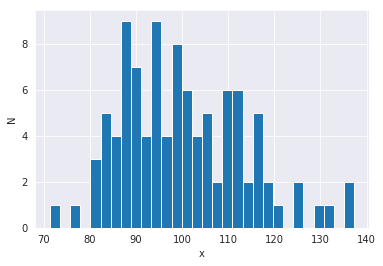

In [4]:
mymean = 100
df = mymean

import numpy as np
np.random.seed(456)
md = {} #initializing empty directory
md['chisq'] = np.random.chisquare(mymean, size = 100)
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x')


**Figure 1:** Chi sq distribution of a sample size of 100 for a chi sq distribution with 100 degrees of freedom

###mean and stdev for chisq

In [0]:
print ("Chisq mean: %.2f, standard deviation: %.2f" %(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


###for 100 distributions


In [0]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

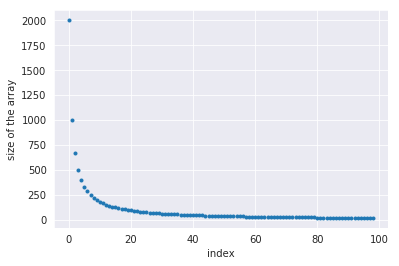

In [0]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 2:** Plot of the sample sizes of each of the chi sq distributions

###making the nested dictionary

Text(1259.3999999999999, 100, 'expected mean')

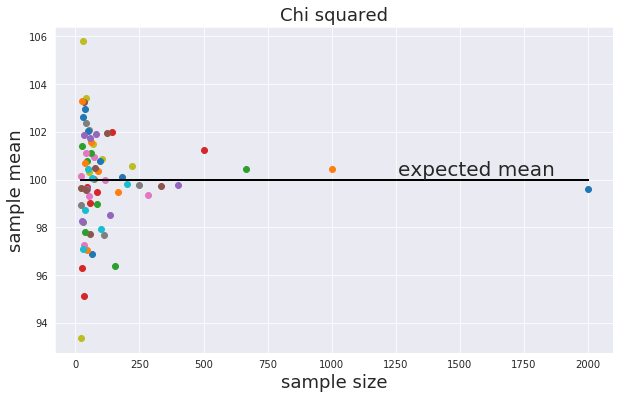

In [0]:
md['chisq'] = {} 

for n in mysize:
  md['chisq'][n] = np.random.chisquare(df,size = n)
  
  
md['chisq']['means']= {}
axchisq_mu_n = pl.figure(figsize = (10,6)).add_subplot(111)

for nn in md['chisq']:
  if not type(nn) == str:
    md['chisq']['means'][nn] = md['chisq'][nn].mean()
    axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
    axchisq_mu_n.set_xlabel('sample size', fontsize=18)
    axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
    axchisq_mu_n.set_title('Chi squared', fontsize=18)
    axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)
    

**Figure 3:** Scatter plot of the means of the chi sq distributions stored in the md dictionary. Distributions with a higher sample size tend to have sample means  that are closer to the expected mean of 100. Moreover, the closer the smaple size is to the population size the more likely that the sample mean will be close to the actual (population) mean

###histogram of the mean of all samples


Text(0, 0.5, 'N')

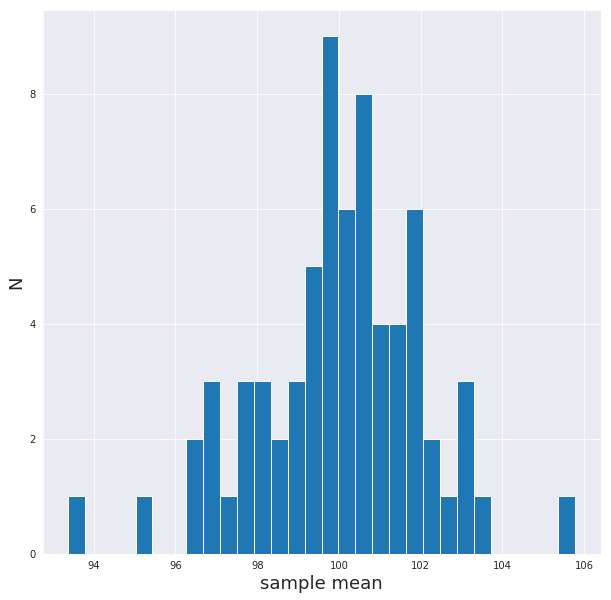

In [0]:
allmeans = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 4:** Histogram of the the sample means of 100 Chi sq distributions

#Normal Distribution


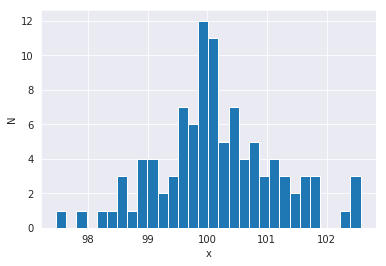

In [0]:
distributions = ['lnorm']
mymean = 100
md['lnorm'] = np.random.normal(mymean, 1.00, size = 100)
pl.hist(md['lnorm'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

**Figure 5:** Normal distribution with a mean of 100 and a sample size of 100


### Lnorm mean and stdev


In [0]:
print ("Lnorm mean: %.2f, standard deviation: %.2f"%(md['lnorm'].mean(), md['lnorm'].std()))

Lnorm mean: 100.16, standard deviation: 1.00


###100 Normal Distributions

In [0]:
mysize= (2000 / (np.array(range(1, 100)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)


shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

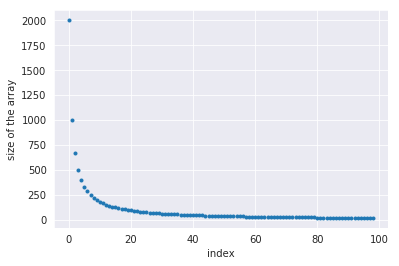

In [0]:
pl.plot(mysize, ".")
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 6:** Scatter plot of smaple sizes used for 100 Normal distributions

Text(1259.3999999999999, 100, 'expected mean')

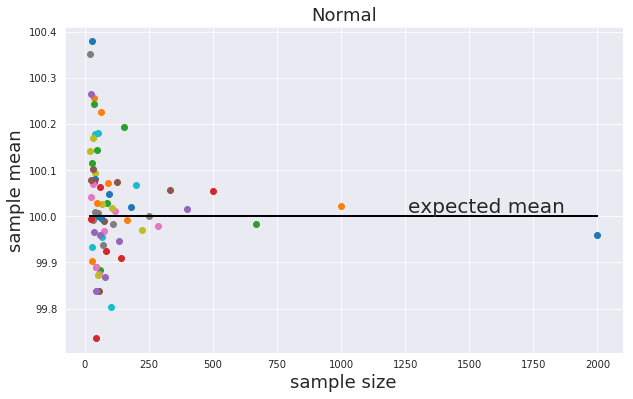

In [0]:
df=mymean

md['lnorm']={}

for n in mysize:
  md['lnorm'][n]=np.random.normal(mymean, 1.00, size = n)
  
md['lnorm']['means'] = {}

axlnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['lnorm']:
  if not type(nn) == str:
    md['lnorm']['means'][nn]=md['lnorm'][nn].mean()
    axlnorm_mu_n.plot(nn, md[ 'lnorm' ][ 'means' ][nn], 'o')
    axlnorm_mu_n.set_xlabel('sample size', fontsize=18)
    axlnorm_mu_n.set_ylabel('sample mean', fontsize=18)
    axlnorm_mu_n.set_title('Normal', fontsize=18)
    axlnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k') 
axlnorm_mu_n.text(axlnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", va="bottom", fontsize=20)

**Figure 7:** Scatter plot of the means of the normal distributions stored in the md dictionary. Distributions with a higher sample size tend to have sample means  that are closer to the expected mean of 100. Moreover, the closer the smaple size is to the population size the more likely that the sample mean will be close to the actual (population) mean

###histogram of the mean of all samples

Text(0, 0.5, 'N')

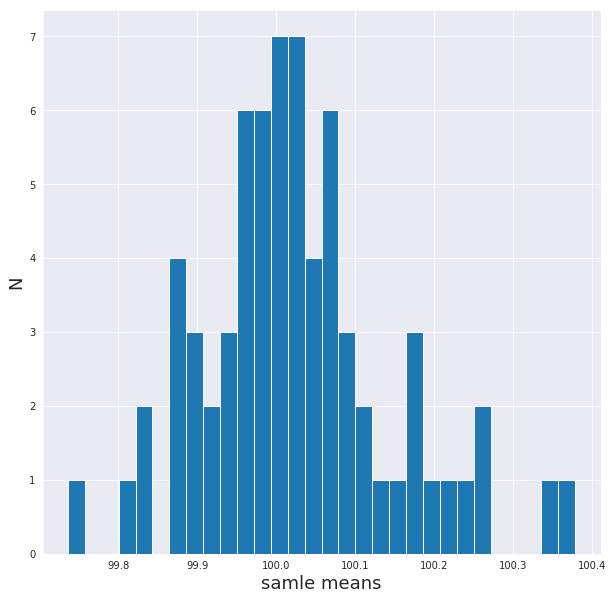

In [0]:
allmeans = list(md['lnorm']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans, bins = 30)
pl.xlabel('samle means', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 8:** Histogram of the means of 100 normal distributions of varying sample size

#Poisson Distribution

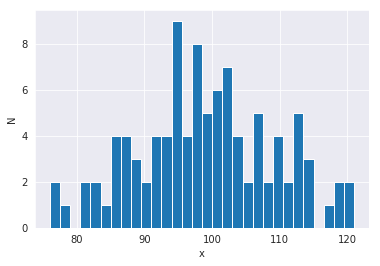

In [0]:
distributions = ['pois']
mymean = 100
lam=mymean
md['pois'] = np.random.poisson(lam, size = 100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

**Figure 9:** Poisson distribution of a sample of size 100 for aa poisson distribution with lambda=100

###100 poisson distributions

In [0]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print ("shape of the 'size' list that contains the size of eaach distribution", mysize.shape)

shape of the 'size' list that contains the size of eaach distribution (99,)


Text(0, 0.5, 'size of the array')

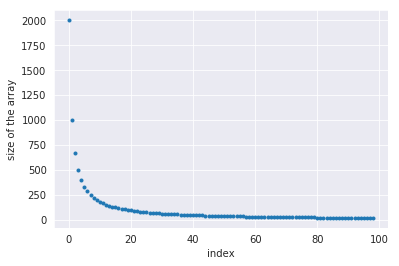

In [0]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 10:** scatter plot of sample size values used for 100 poisson distributions 

Text(1259.3999999999999, 100, 'expected mean')

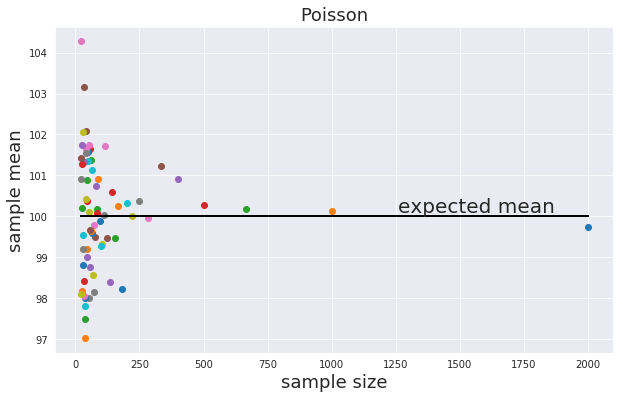

In [0]:
md['pois']={}

for n in mysize:
  md['pois'][n] = np.random.poisson(lam, size = n)
  
md['pois']['means']={}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()

        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [lam, lam], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 11:** Scatter plot of the means of the chi sq distributions stored in the md dictionary. Distributions with a higher sample size tend to have sample means  that are closer to the expected mean of 100. Moreover, the closer the smaple size is to the population size the more likely that the sample mean will be close to the actual (population) mean

###histogram of all samples

Text(0, 0.5, 'N')

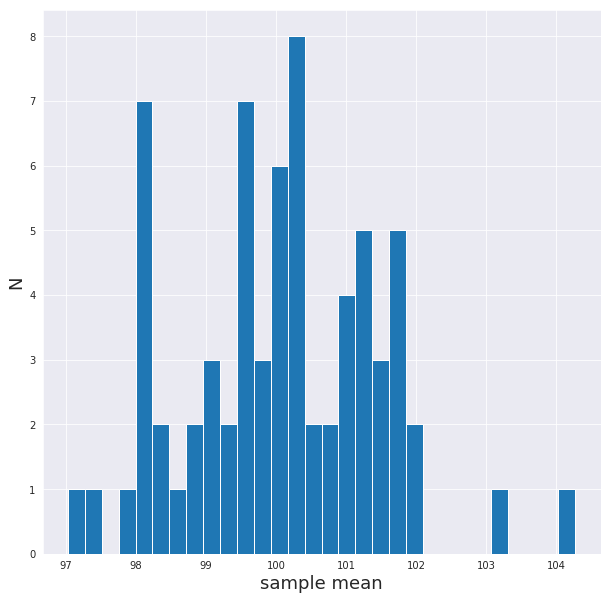

In [0]:
allmeans = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 12:**  Histogram of 100 sample means from 100 Poisson distributions

#Binomial Distribution

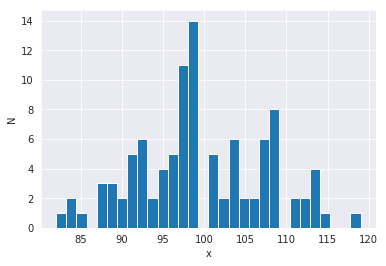

In [12]:
distributions = ['binomial']
mymean = 100
md['binomial'] = np.random.binomial(200,.5, size = 100)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

**Figure 13:** Binomial Distribution with a sample size of 100

###binomial mean and standard deviation

In [0]:

print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))


Binomial mean: 99.83, standard deviation: 6.75


###For 100 Binomial Distributions

In [10]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

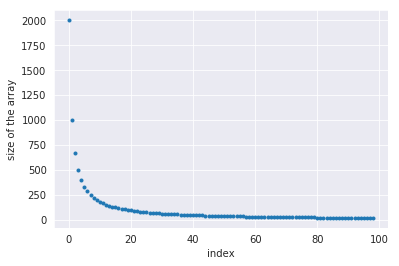

In [11]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 14:** Scatter plot of the sample sizes used for 100 Binomial distributions

Text(1259.3999999999999, 100, 'expected mean')

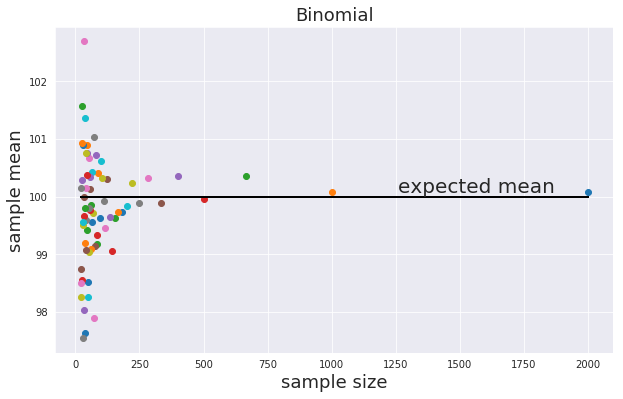

In [13]:
md['binomial']={}

for n in mysize:
  md['binomial'][n] = np.random.binomial(200,.5, size = n)
  
md['binomial']['means']={}
axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()

        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axbinomial_mu_n.text(axbinomial_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 15:** Scatter plot of the means of the chi sq distributions stored in the md dictionary. Distributions with a higher sample size tend to have sample means  that are closer to the expected mean of 100. Moreover, the closer the smaple size is to the population size the more likely that the sample mean will be close to the actual (population) mean.

###Histogram of all samples

Text(0, 0.5, 'N')

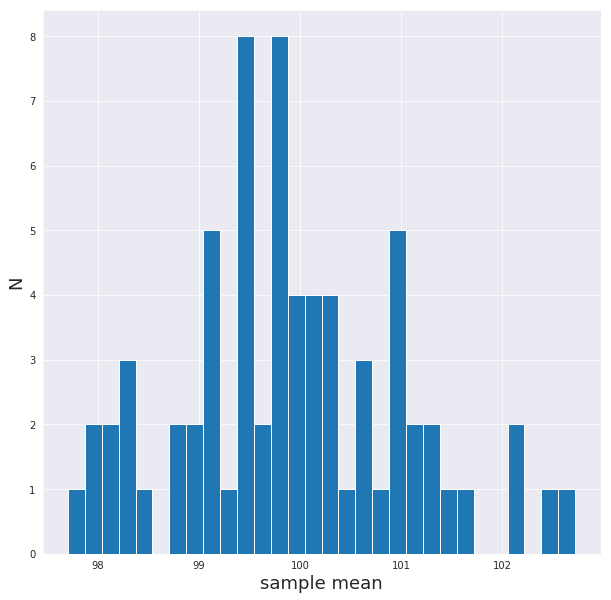

In [0]:
allmeans = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 16:** Histogram of 100 sample means from 100 Binomial distributions

#Cauchy Distribution

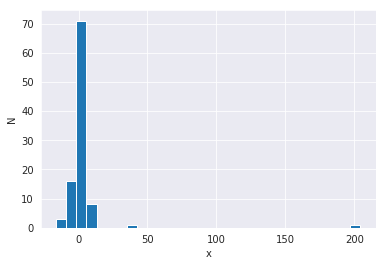

In [14]:
distributions = ['cauchy']
mymean=0
md['cauchy'] = np.random.standard_cauchy(size = 100)
pl.hist(md['cauchy'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');

**Figure 17:** Cauchy Distribution with a sample size of 100

###Cauchy mean and standard deviation

In [15]:
print ("Cauchy mean: %.2f, standard deviation: %.2f"%(md['cauchy'].mean(), md['cauchy'].std()))

Cauchy mean: 2.39, standard deviation: 21.03


###For 100 Cauchy Distributions

In [16]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


Text(0, 0.5, 'size of the array')

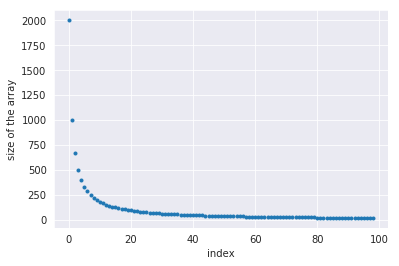

In [17]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")

**Figure 18:** Scatter plot of sample sizes used for 100 different Cauchy distributions

Text(1259.3999999999999, 0, 'expected mean')

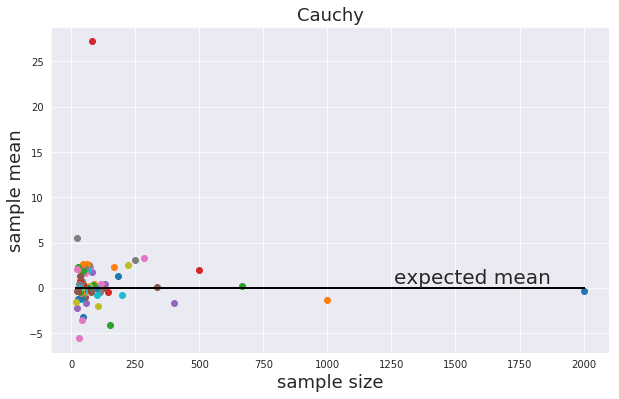

In [22]:
md['cauchy']={}

for n in mysize:
  md['cauchy'][n] = np.random.standard_cauchy(size = n)
  
md['cauchy']['means']={}
axcauchy_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['cauchy']:
    if not type(nn) == str:
        md['cauchy']['means'][nn] = md['cauchy'][nn].mean()

        axcauchy_mu_n.plot(nn, md['cauchy']['means'][nn], 'o')
        axcauchy_mu_n.set_xlabel('sample size', fontsize=18)
        axcauchy_mu_n.set_ylabel('sample mean', fontsize=18)
        axcauchy_mu_n.set_title('Cauchy', fontsize=18)
        axcauchy_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axcauchy_mu_n.text(axcauchy_mu_n.get_xlim()[1] * .6, 0, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 19:** Scatter plot of the means of the Cauchy distributions stored in the md dictionary. Distributions with a higher sample size tend to have sample means  that are closer to the expected mean of 100. Moreover, the closer the smaple size is to the population size the more likely that the sample mean will be close to the actual (population) mean

Text(0, 0.5, 'N')

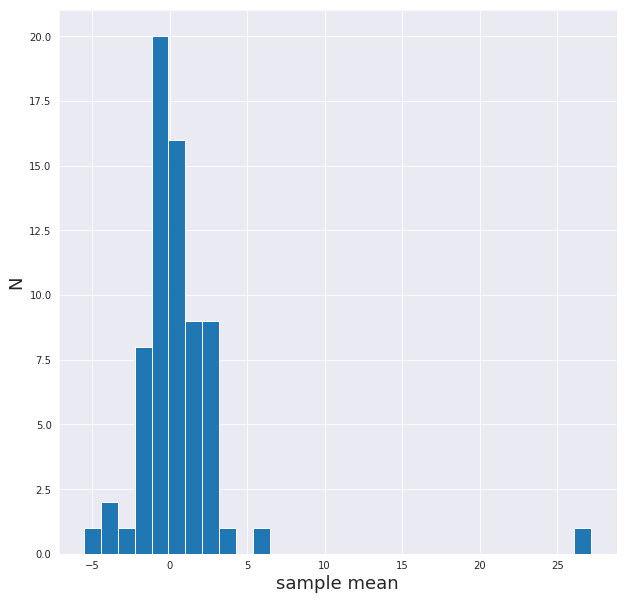

In [23]:
allmeans = list(md['cauchy']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)

**Figure 20:** Histogram of the means of 100 Cauchy Distributions.